## Homework 3

Q1.

Dataset: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data


Q2.

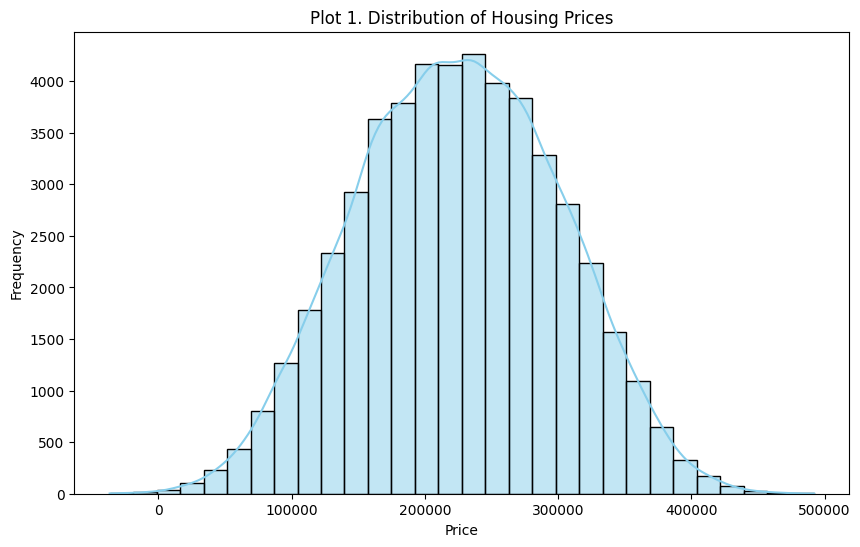

In [22]:
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
housing_data = pd.read_csv('/content/housing_price_dataset.csv')
pricing_data = housing_data['Price']

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(pricing_data, kde=True, color='skyblue', bins=30)
plt.title('Plot 1. Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


From plot 1, we can conclude that the variable "Price" is continuous and follows a normal distribution. Thus, we can apply a PyMC normal-gamma specification.

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,224827.385,337.09,224186.812,225456.667,5.556,3.929,3685.0,2863.0,1.0
tau,0.000,0.00,0.000,0.000,0.000,0.000,3921.0,3099.0,1.0


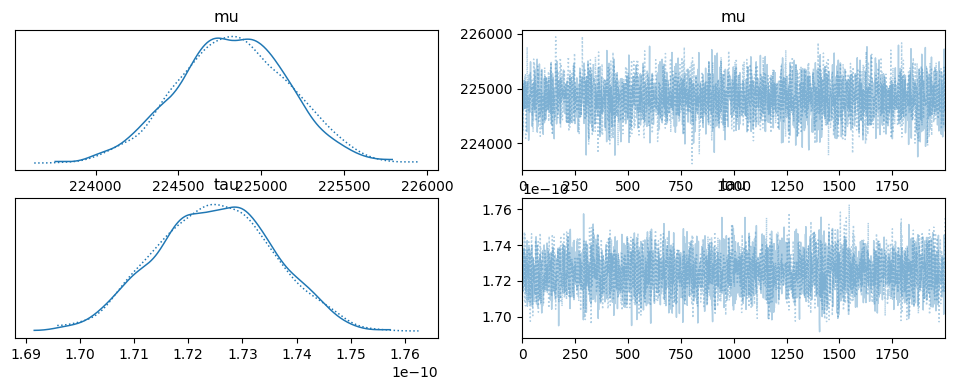

In [7]:
import pymc as pm
import pandas as pd
import numpy as np

# PyMC Normal-Gamma Specification
with pm.Model() as normal_gamma_model:
    # Define priors
    mu = pm.Normal('mu', mu=pricing_data.mean(), sigma=pricing_data.std())
    tau = pm.Gamma('tau', alpha=2, beta=1)

    # Define likelihood
    y = pm.Normal('y', mu=mu, tau=tau, observed=pricing_data)

# Perform MCMC sampling
with normal_gamma_model:
    trace_normal_gamma = pm.sample(2000, tune=1000)

pm.plot_trace(trace_normal_gamma)
pm.summary(trace_normal_gamma)


Q2.

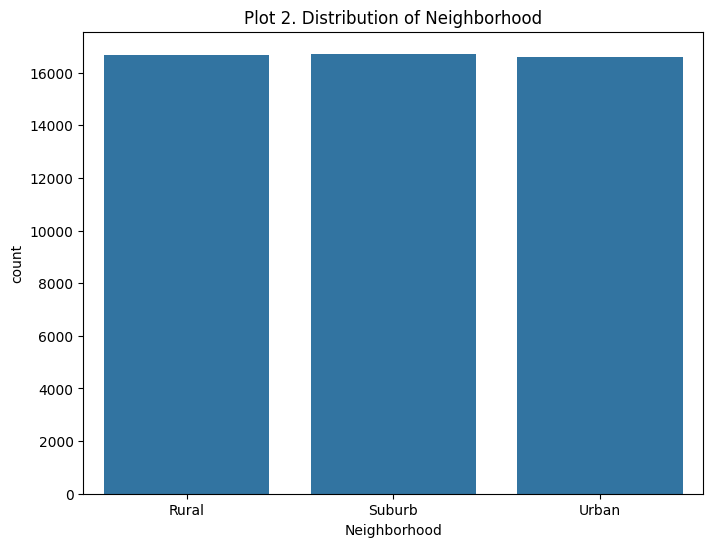

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

neighborhood_data = housing_data['Neighborhood']
plt.figure(figsize=(8, 6))
sns.countplot(x='Neighborhood', data=housing_data)
plt.title('Plot 2. Distribution of Neighborhood')
plt.show()


Plot 2 shows us that the variable "Neighborhood" is a categorical variable, and each category in the "Neighborhood" column is weighted approximatly 33%.

Q3, 4.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
category_probs[0],0.333,0.002,0.330,0.337,0.0,0.0,2389.0,2664.0,1.0
category_probs[1],0.334,0.002,0.331,0.338,0.0,0.0,2569.0,2249.0,1.0
category_probs[2],0.332,0.002,0.328,0.336,0.0,0.0,3174.0,2886.0,1.0


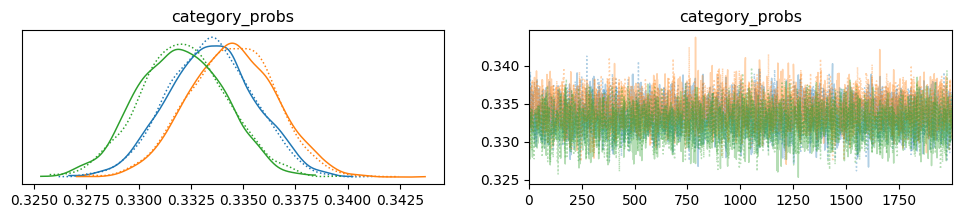

In [26]:
import pymc as pm
import pandas as pd

neighborhood_codes = pd.Categorical(neighborhood_data).codes

# PyMC Categorical Specification
with pm.Model() as categorical_model:
    # Define prior for category probabilities
    category_probs = pm.Dirichlet('category_probs', a=np.ones(3))
    y = pm.Categorical('y', p=category_probs, observed=neighborhood_codes)

with categorical_model:
    trace_categorical = pm.sample(2000, tune=1000)

pm.plot_trace(trace_categorical)
pm.summary(trace_categorical)
